# 1. Historical Model


### Required inputs:
- Soils
- Stage-Storage
- Historical Climate
- Calibration Data


### Results: 
- Model Data
- Timeseries
- Model Parameters

To run, specify filepath of repository folder on your local machine. 

The filepath './' denotes the root folder relative to this notebook, so unless you are referencing input files in a different location than this notebook file, you can leave this as is. 

The input files must maintain the same general subfolder structure. 


Pond3
Blaney Criddle fit parameters: a =  1.3354728713713664  b =  -5.381683295118156
      status  plot_inundation  lattitude  eto_zone  spillway_elev  \
Pond3    run                0   37.21736         8          653.7   

       wshed_area_sqft soils_sheetname stage_storage_sheetname  \
Pond3       1632885.21           Pond3                   Pond3   

                  calib_area_filename calib_area_sheetname  ... gw_out_bottom  \
Pond3  219007_google_earth_validation                Pond3  ...          0.05   

      rainfall_area_percent soil_depth_percent gw_in_percent  \
Pond3                   2.0                1.5           0.1   

      deep_fault_flow_wshed deep_fault_flow_thresh deep_fault_flow_lag  \
Pond3                  0.01                    0.5                 0.7   

      gw_seep_wshed gw_seep_thresh  gw_seep_lag  
Pond3           0.2            0.5          0.4  

[1 rows x 30 columns]
[0.05 0.05 2.   1.5  0.1  0.01 0.5  0.7 ] sum squared error:  1.04723994278118

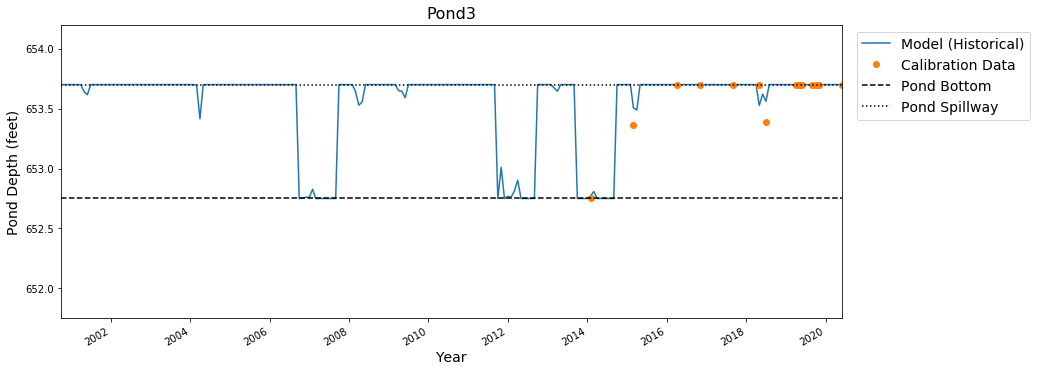

In [2]:

################### user inputs ###############################
# if you are running input files in the same directory as this notebook file, use './', otherwise change to the desired file path
repo_folder = './'  


## specify the input filename of the main_inputs file; do not include file extension
master_input_filename = 'main_inputs'





###############################################################
import os
os.chdir(repo_folder)
# import importlib

from pondit.load_data import *
from pondit.calc_ET import *
from pondit.calc_model import *
from pondit.plot_model import *

import pandas
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

folder_in = repo_folder + '/inputs/'
folder_out = repo_folder + '/results/'

### load input data common to all sites
scalars = pandas.read_csv(folder_in + master_input_filename + '.csv', index_col=0)

site_list = scalars.index
site_list = scalars.loc[scalars['status'] != 'done', :].index


for site in site_list:
    sws_calc_dict = {}
    print(site)
    ## load data
    stage_storage, soils, data_hist, last_hist_date, calib_data = load_data(scalars, site, folder_in)

    
    bc_calc = calc_ET(data_hist, scalars, site, repo_folder)

    sws_calc, out, scalars_out = calc_pondit(bc_calc, scalars, site, stage_storage, soils, repo_folder, calib_data)
    sws_calc.to_csv(folder_out + '/data/'+ site + '_data_hist.csv')
    scalars_out.to_csv(folder_out + 'data/' + site + '_model_params_hist.csv')
    plot_model(sws_calc, scalars, site, folder_out)
        



In [2]:
scalars

,status,plot_inundation,lattitude,eto_zone,spillway_elev,wshed_area_sqft,soils_sheetname,stage_storage_sheetname,calib_area_filename,calib_area_sheetname,calib_elev_filename,calib_elev_sheetname,stage_storage_filename,soils_filename,hist_data_filename,proj_precip_filename,proj_temp_filename,gw_seep,gw_fault
site,,,,,,,,,,,,,,,,,,,
Pond3,run,0,37.217360,8,653.7,1.632885e+06,Pond3,Pond3,219007_google_earth_validation,Pond3,219007_ponds_wse_monthly,Pond3,219007_stage_storage,219007_soils,CROSP,pr_proj,tas_proj,n,y
Pond5,done,0,37.210589,8,473.0,3.081708e+05,Pond5,Pond5,219007_google_earth_validation,Pond5,219007_ponds_wse_monthly,Pond5,219007_stage_storage,219007_soils,CROSP,pr_proj,tas_proj,n,y
